In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, kpss

In [328]:
data = pd.read_csv('../data/processed_data.csv')
data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)
data.head()

,date,wday,month,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,item_id,store_id,cnt,sell_price,type_Cultural,type_National,type_Religious,type_Sporting,is_weekend
0,2011-01-29,1,1,1,0,0,0,STORE_2_085,STORE_2,3,1.00,0,0,0,0,1
1,2011-01-29,1,1,1,0,0,0,STORE_2_043,STORE_2,6,2.88,0,0,0,0,1
2,2011-01-29,1,1,1,0,0,0,STORE_2_054,STORE_2,6,2.28,0,0,0,0,1
3,2011-01-29,1,1,1,0,0,0,STORE_2_325,STORE_2,0,NaN,0,0,0,0,1
4,2011-01-29,1,1,1,0,0,0,STORE_2_090,STORE_2,108,1.25,0,0,0,0,1


### Визуальный осмотр

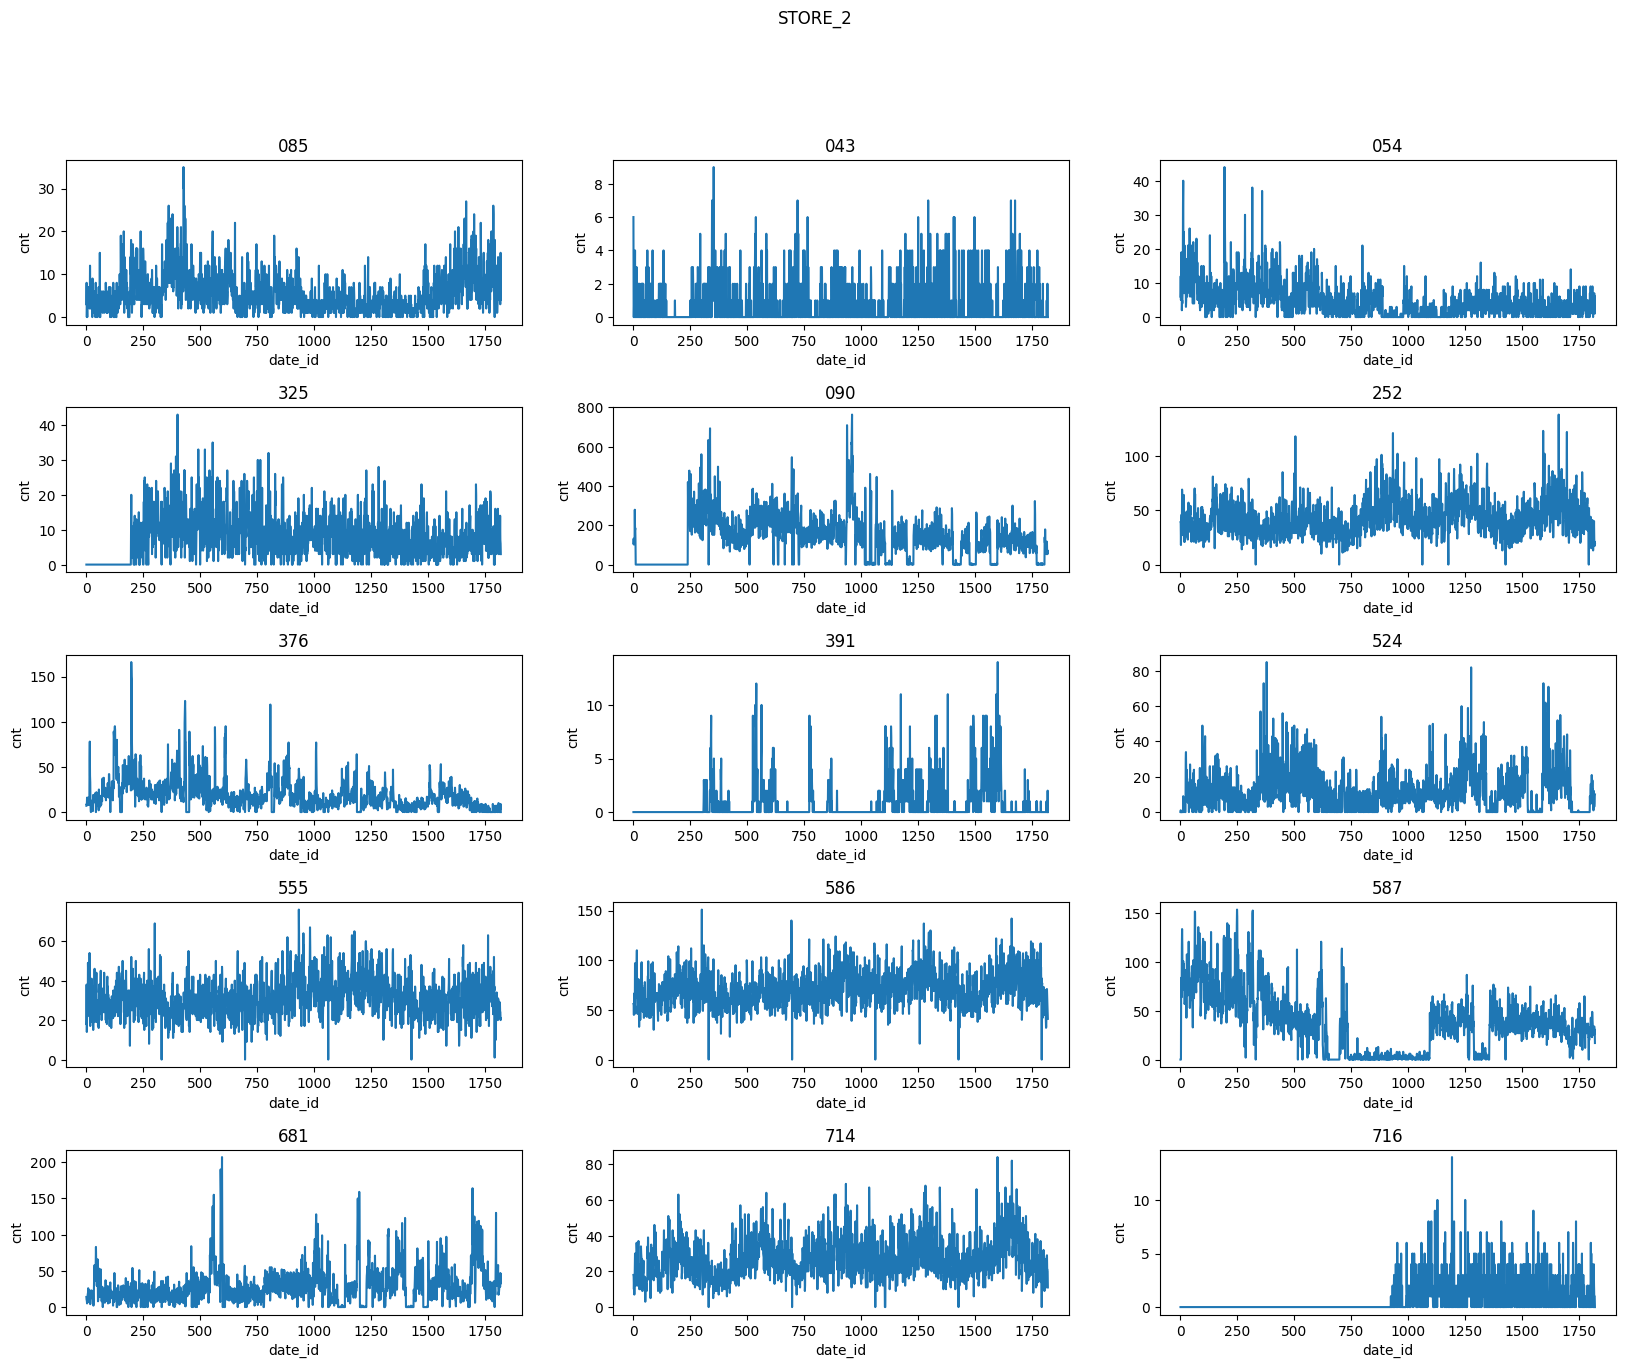

In [329]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    tmp=data[(data.item_id==art) & (data.store_id==store_id)].copy()
    sns.lineplot(data=tmp, x='date_id', y='cnt', ax = ax[i//3][i%3])
    ax[i // 3][i % 3].set_title(art.split('_')[-1])
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

Распределение таргета

In [330]:
def adf_test(series):
    stat, p_value, _, _, _, _ = adfuller(series, autolag='AIC')
    if p_value < 0.05:
        return True
    else:
        return False

def kpss_test(series):
    stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")
    if p_value < 0.05:
        return False
    else:
        return True

/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-valu

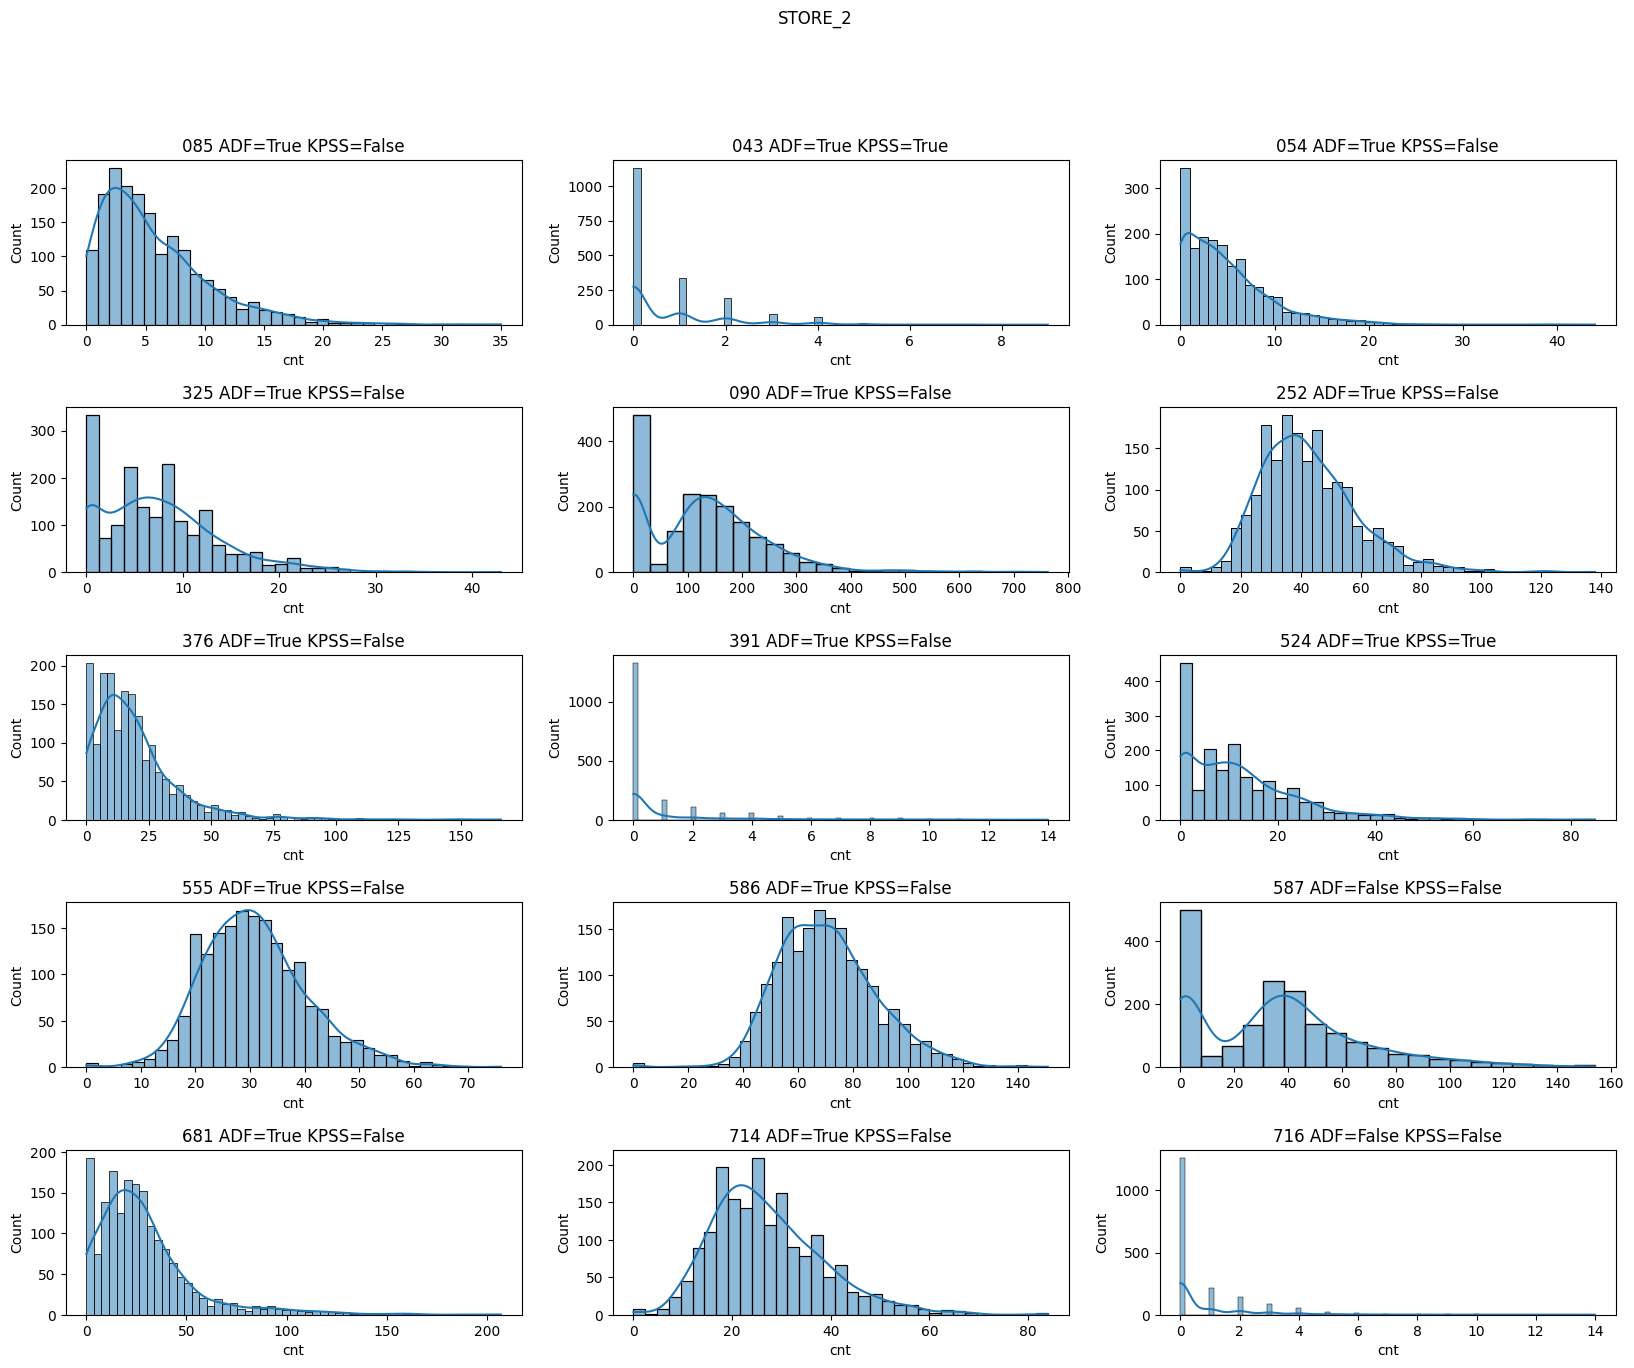

In [331]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    tmp = data[(data.item_id==art) & (data.store_id==store_id)].cnt.copy()
    adf_result = adf_test(tmp)
    kpss_result = kpss_test(tmp)
    sns.histplot(tmp, ax = ax[i//3][i%3], kde=True)
    ax[i // 3][i % 3].set_title(art.split('_')[-1] + " ADF=" + str(adf_result) + ' KPSS=' + str(kpss_result))
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

1.Критерий Дики-Фуллера обычно используется для проверки наличия единичного корня в ряде, что означает, что ряд нестационарен. Если результат этого теста указывает на стационарность ряда, это может означать, что тренд в данных учтен или устранен.

2.Критерий KPSS, напротив, используется для проверки нулевой гипотезы о том, что временной ряд стационарен. Если результат этого теста указывает на нестационарность ряда, это может свидетельствовать о том, что в ряде есть сезонные компоненты, которые не были учтены или удалены.

Имеем дело со стохастическим трендом.

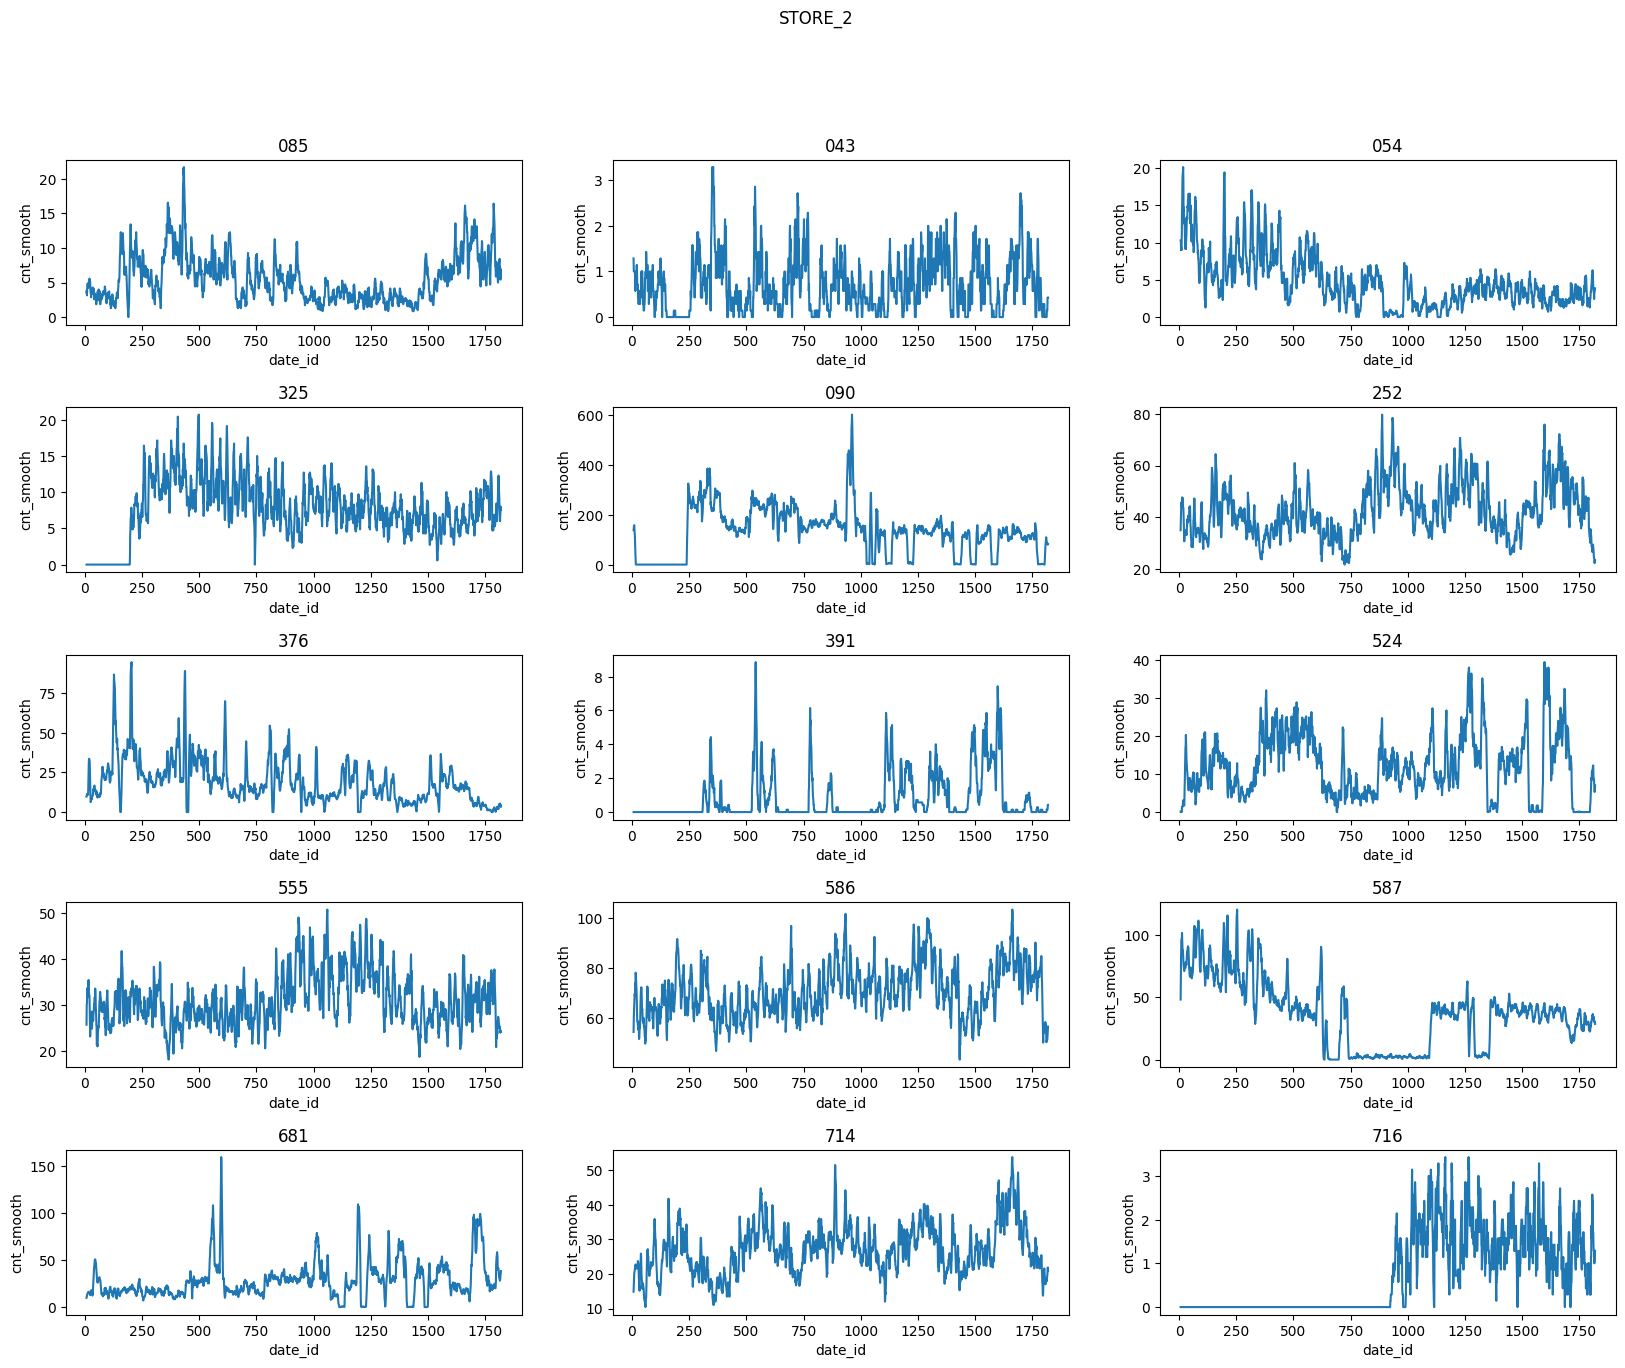

In [332]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    tmp = data[(data.item_id==art) & (data.store_id==store_id)].copy()
    tmp['cnt_smooth'] = tmp['cnt'].rolling(window=7).mean()
    sns.lineplot(data=tmp, x='date_id', y='cnt_smooth', ax = ax[i//3][i%3])
    ax[i // 3][i % 3].set_title(art.split('_')[-1])
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

In [333]:
# from scipy.stats import boxcox

# store_id = 'STORE_2'

# fig,ax = plt.subplots(5, 3, figsize=(20, 15))

# arts = data[data.store_id == store_id].item_id.unique()
# for i, art in enumerate(arts):
#     tmp = data[(data.item_id==art) & (data.store_id==store_id)].copy()
#     tmp['boxcox_cnt'], lambda_ = boxcox(tmp['cnt'] + 1)
#     tmp['cnt_smooth'] = tmp['cnt'].rolling(window=10).mean()
#     sns.lineplot(data=tmp, x='date_id', y='boxcox_cnt', ax = ax[i//3][i%3])
#     ax[i // 3][i % 3].set_title(art.split('_')[-1] + f' lambda = {round(lambda_, 2)}')
# plt.suptitle(store_id + ' BOXCOX')
# plt.subplots_adjust(hspace=0.5)

In [334]:
# for i, art in enumerate(arts):
#     temp=data[(data.item_id==art) & (data.store_id==store_id)]
#     print(store_id, art.split('_')[-1])
#     print(temp.describe().to_string())

In [335]:
# data.isnull().sum()

In [336]:
art085=data[(data.item_id==store_id + '_085') & (data.store_id==store_id)]
art085.head(10)

,date,wday,month,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,item_id,store_id,cnt,sell_price,type_Cultural,type_National,type_Religious,type_Sporting,is_weekend
0,2011-01-29,1,1,1,0,0,0,STORE_2_085,STORE_2,3,1.0,0,0,0,0,1
45,2011-01-30,2,1,2,0,0,0,STORE_2_085,STORE_2,8,1.0,0,0,0,0,1
90,2011-01-31,3,1,3,0,0,0,STORE_2_085,STORE_2,0,1.0,0,0,0,0,0
135,2011-02-01,4,2,4,0,1,1,STORE_2_085,STORE_2,3,1.0,0,0,0,0,0
180,2011-02-02,5,2,5,1,1,0,STORE_2_085,STORE_2,0,1.0,0,0,0,0,0
225,2011-02-03,6,2,6,1,1,1,STORE_2_085,STORE_2,7,1.0,0,0,0,0,0
270,2011-02-04,7,2,7,0,1,0,STORE_2_085,STORE_2,4,1.0,0,0,0,0,0
315,2011-02-05,1,2,8,1,1,1,STORE_2_085,STORE_2,5,1.0,0,0,0,0,1
360,2011-02-06,2,2,9,1,1,1,STORE_2_085,STORE_2,3,1.0,0,0,0,1,1
405,2011-02-07,3,2,10,0,1,1,STORE_2_085,STORE_2,7,1.0,0,0,0,0,0


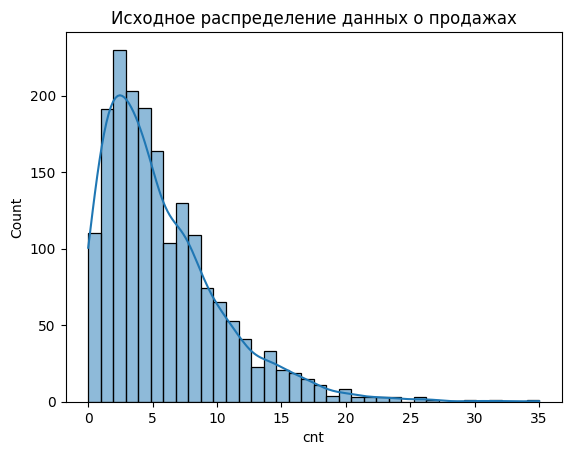

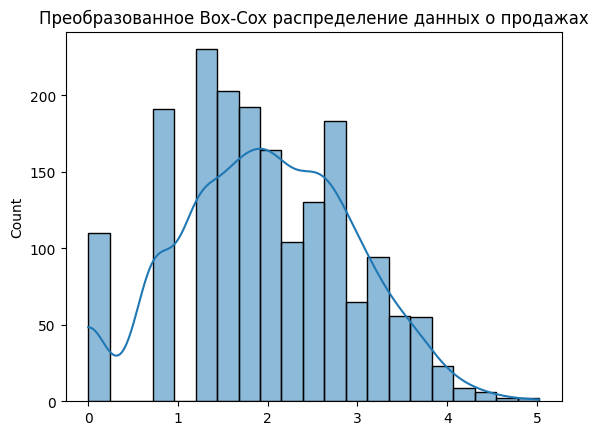

Значение λ (lambda): 0.17895780988924995
Оригинальные данные: [ 3  8  0 ...  3 15  4]
Обратные преобразованные данные: [ 3.  8.  0. ...  3. 15.  4.]


In [337]:
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns

sales_data = art085.copy().cnt

sns.histplot(sales_data, kde=True)
plt.title("Исходное распределение данных о продажах")
plt.show()

transformed_data, lambda_value = stats.boxcox(sales_data + 1) 

sns.histplot(transformed_data, kde=True)
plt.title("Преобразованное Box-Cox распределение данных о продажах")
plt.show()

print("Значение λ (lambda):", lambda_value)

inverse_transformed_data = special.inv_boxcox(
    transformed_data, lambda_value) - 1

print("Оригинальные данные:", sales_data.values)
print("Обратные преобразованные данные:", inverse_transformed_data)

In [357]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, acf_lags=100, pacf_lags=30):
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))

    plot_acf(series, lags=acf_lags, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')

    plot_pacf(series, lags=pacf_lags, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.show()

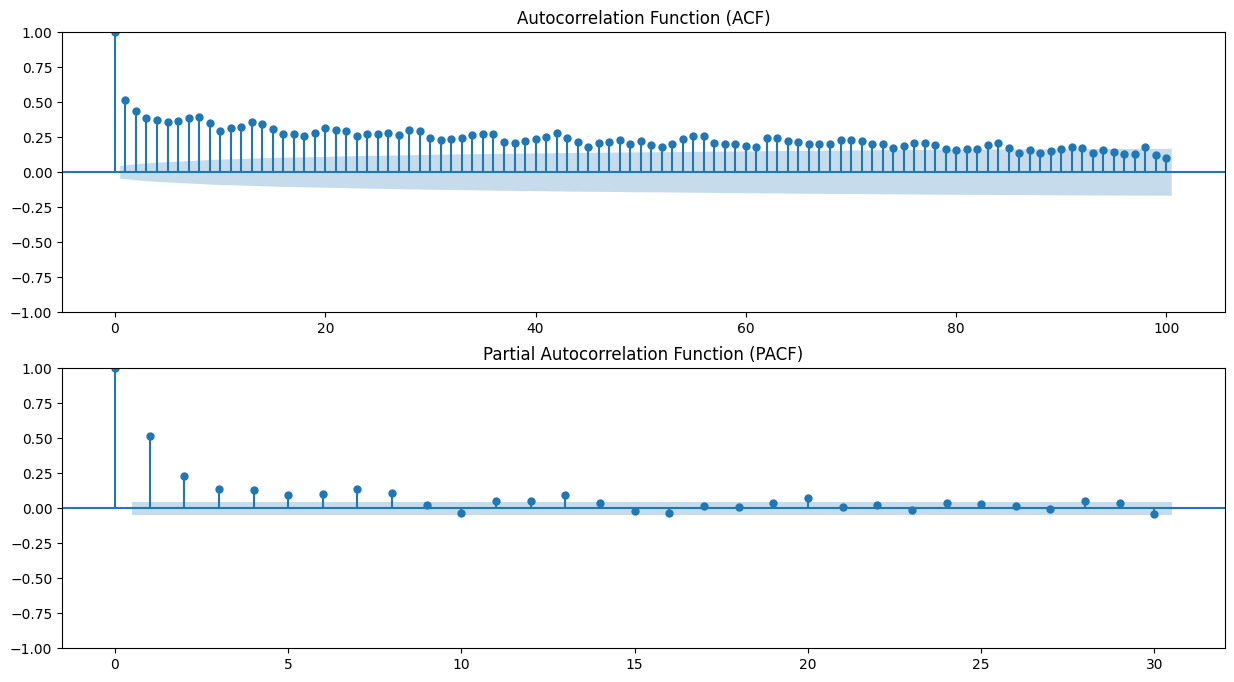

In [358]:
plot_acf_pacf(art085.cnt, acf_lags=100, pacf_lags=30)

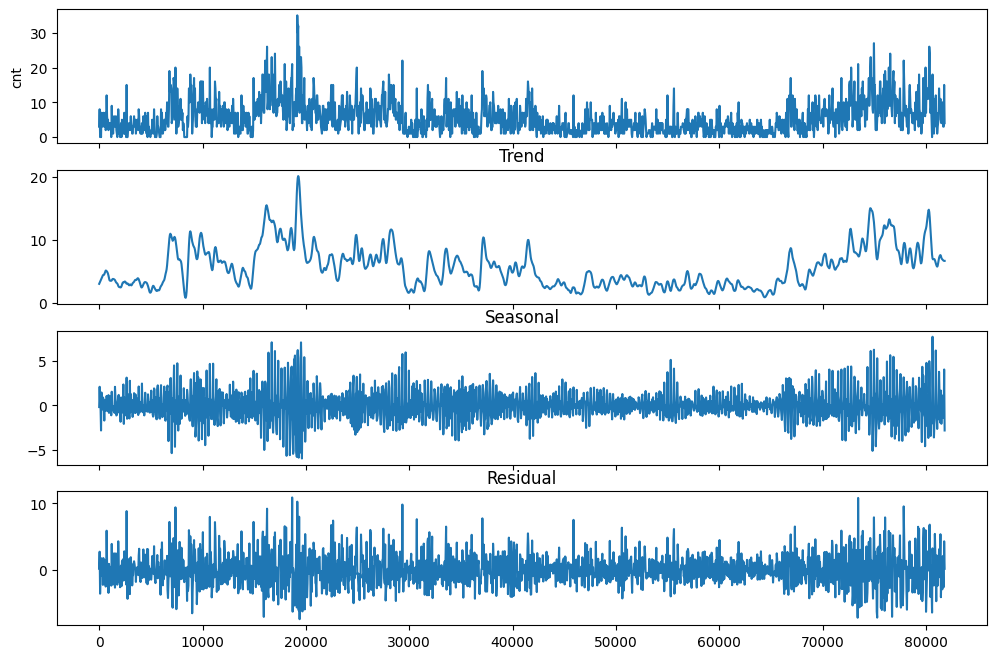

In [362]:
from statsmodels.tsa.seasonal import STL
stl = STL(art085['cnt'], period=7, )
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
# result.observed.plot(ax=axes[0], title='Observed')
sns.lineplot(art085.cnt, ax=axes[0])
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')
plt.show()

/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")


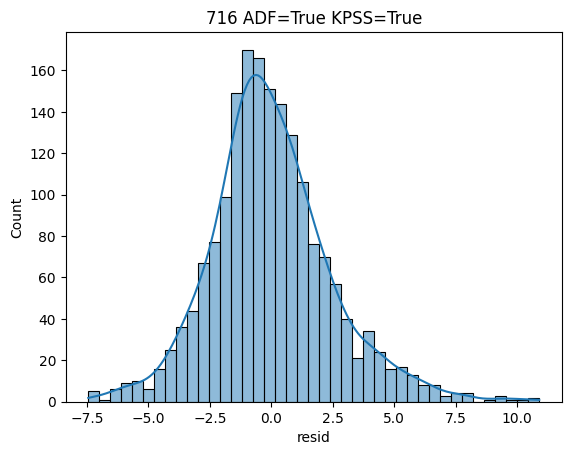

In [363]:
adf_result = adf_test(result.resid)
kpss_result = kpss_test(result.resid)
sns.histplot(result.resid, kde=True)
plt.title(art.split('_')[-1] + " ADF=" + str(adf_result) + ' KPSS=' + str(kpss_result))
plt.show()

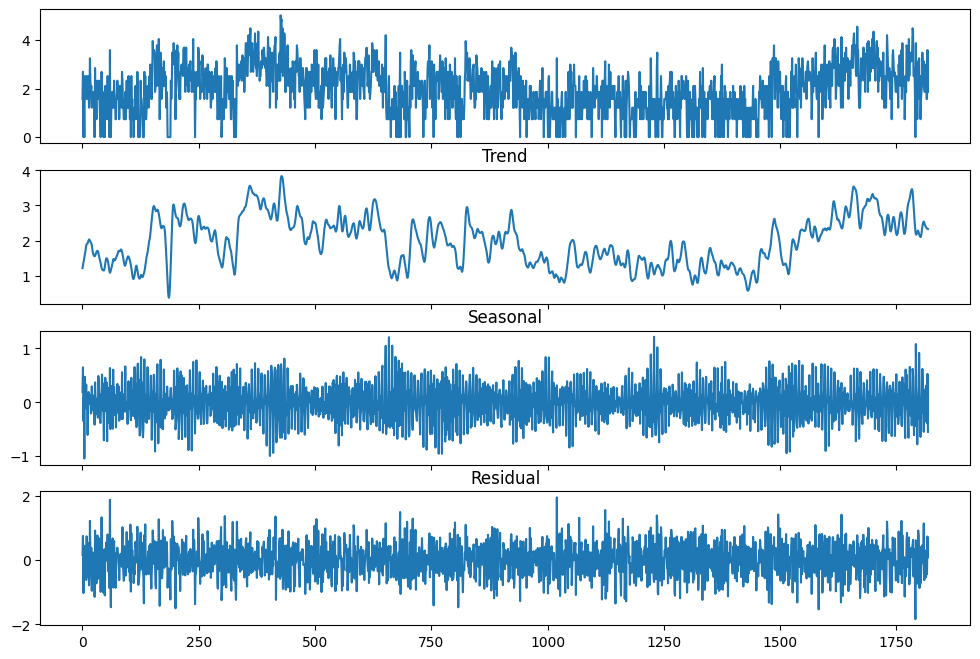

In [361]:
transformed_data, lambda_value = stats.boxcox(art085['cnt'] + 1) 
stl = STL(pd.Series(transformed_data), period=7,)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
# result.observed.plot(ax=axes[0], title='Observed')
sns.lineplot(transformed_data, ax=axes[0])
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')
plt.show()

/tmp/ipykernel_22099/39579521.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(series, regression='c', nlags="auto")


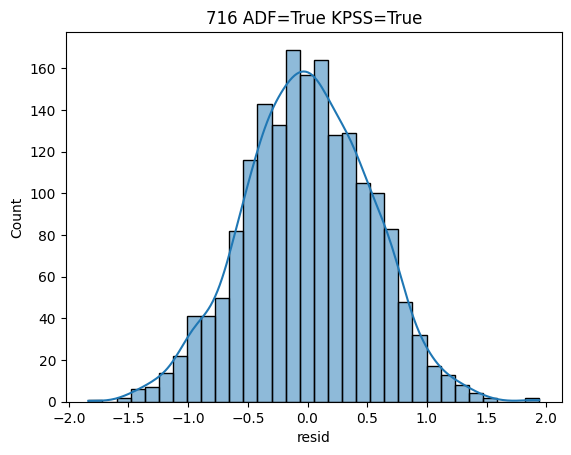

In [346]:
adf_result = adf_test(result.resid)
kpss_result = kpss_test(result.resid)
sns.histplot(result.resid, kde=True)
plt.title(art.split('_')[-1] + " ADF=" + str(adf_result) + ' KPSS=' + str(kpss_result))
plt.show()

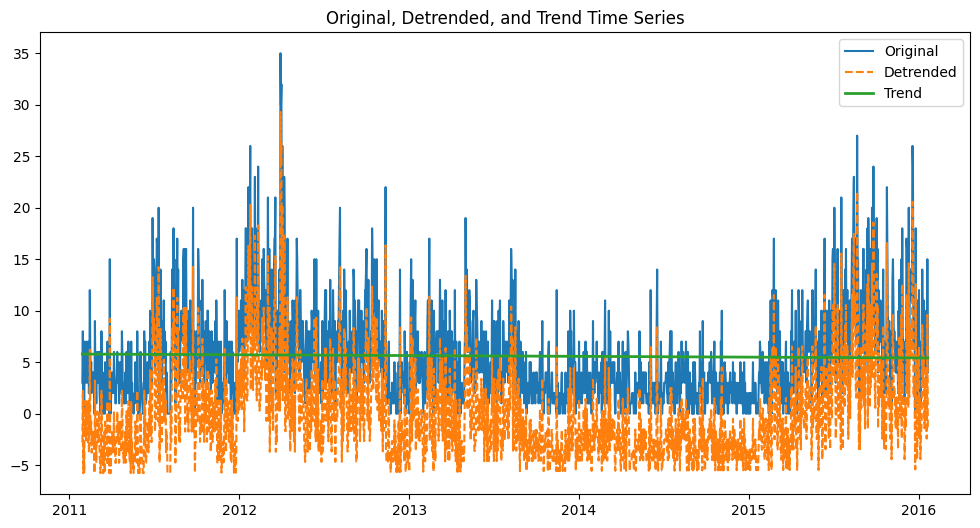

In [341]:
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

# Загрузка данных
data = art085.copy()
data.set_index('date', inplace=True)

# Определение модели тренда (полиномиальная степень 1 - линейный тренд)
trend_forecaster = PolynomialTrendForecaster(degree=1)

# Создание объекта Detrender с указанным тренд-форкастером
detrender = Detrender(forecaster=trend_forecaster)

# Применение детрендинга к данным
detrended = detrender.fit_transform(data['cnt'])

# Подгонка тренд-форкастера для получения тренда
trend_forecaster.fit(data['cnt'])
trend = trend_forecaster.predict(fh=data.index)

# Визуализация исходного, детрендированного ряда и тренда
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['cnt'], label='Original')
plt.plot(data.index, detrended, label='Detrended', linestyle='--')
plt.plot(data.index, trend, label='Trend', linewidth=2)
plt.legend()
plt.title('Original, Detrended, and Trend Time Series')
plt.show()

In [342]:
detrended.head()

date
2011-01-29   -2.790063
2011-01-30    2.210147
2011-01-31   -5.789644
2011-02-01   -2.789435
2011-02-02   -5.789225
Name: cnt, dtype: float64